# Analyzing images of disturbed lines

## Initialization

In [6]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [7]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid_tools as vt
import py.metrics as me
from py.tools.imshow import imshow
import matplotlib.pyplot as plt
LOGGERDEFINED = logs.openLog('still_measure.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# measure videos

measure all videos

In [109]:
run ../../tests/test_disturbVert

.
----------------------------------------------------------------------
Ran 1 test in 0.157s

OK


INFO: Exported \\cfs2e.nist.gov\642\internal\3D Printing Lab\Shopbot\videos\singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbXS_+y_1.250\disturbXS_+y_1.250_xsMeasure_I_3.00_S_2.50_220928_163204_6.csv


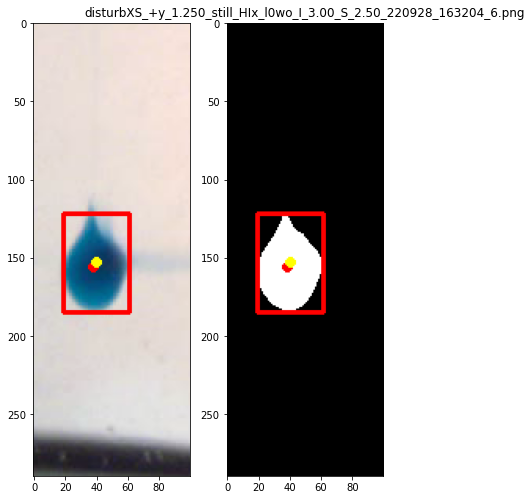

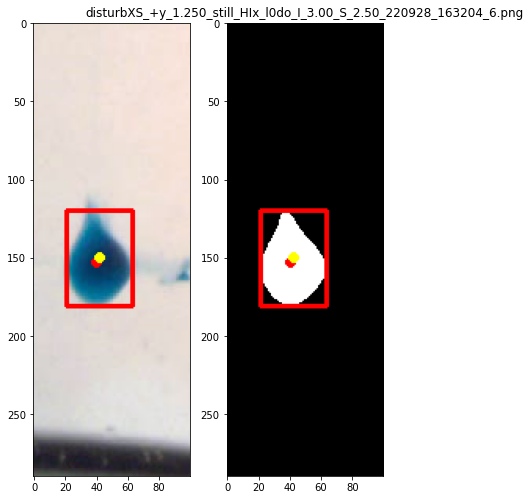

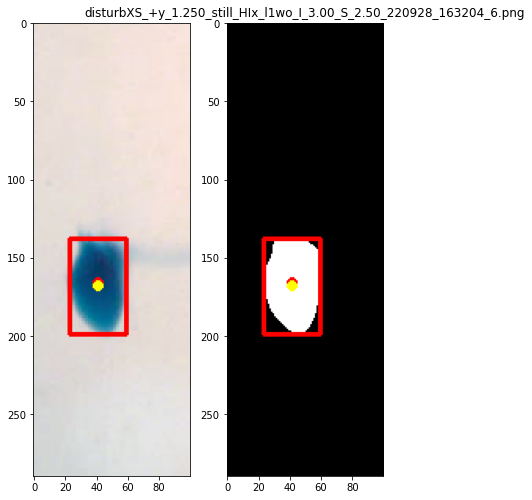

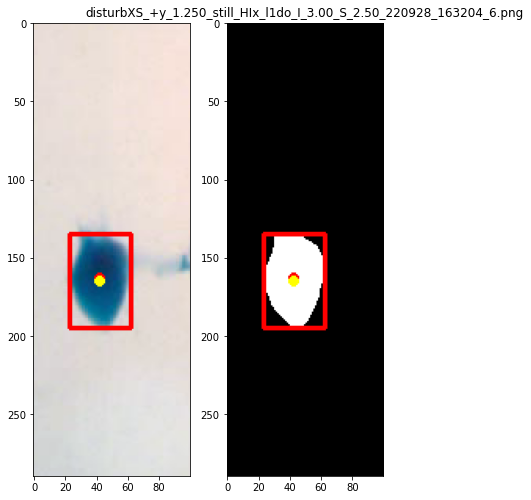

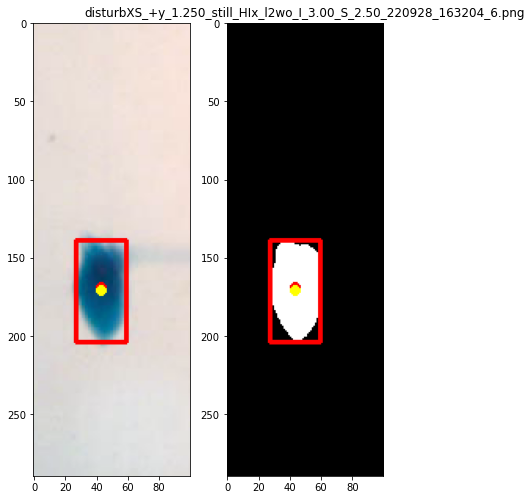

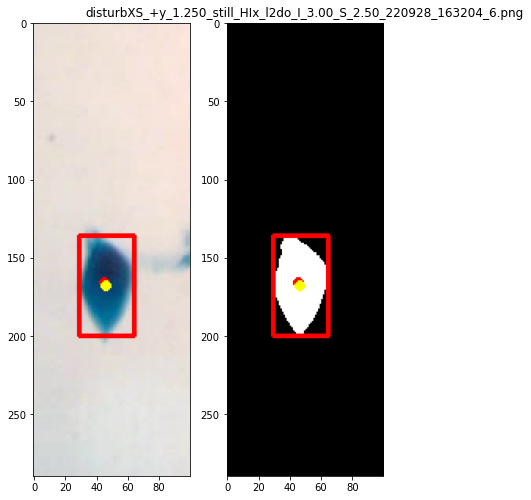

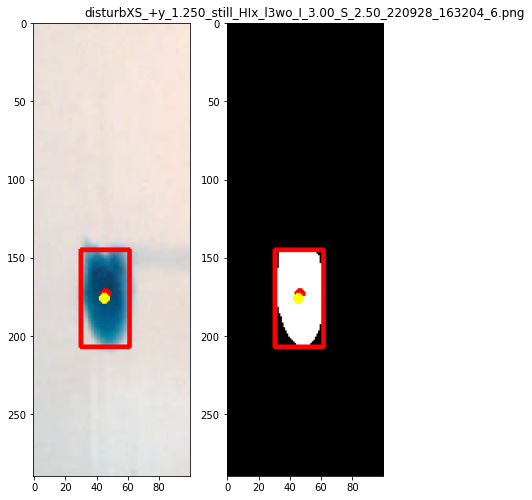

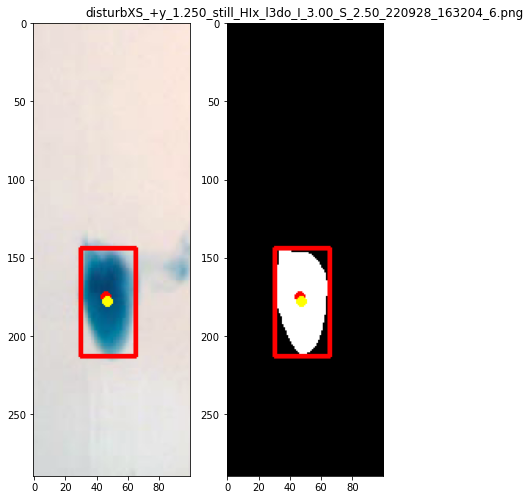

In [34]:
me.xsDisturbMeasures(r'\\cfs2e.nist.gov\642\internal\3D Printing Lab\Shopbot\videos\singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbXS_+y_1.250', overwrite=True, diag=1)

INFO: Threshold: 100, product: 39.93559322033898, white:80


({}, {})

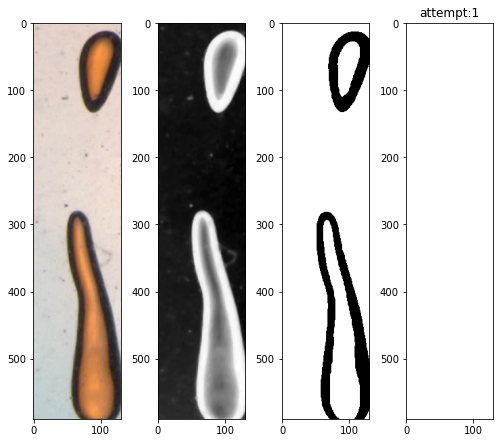

In [117]:
folder = os.path.join(cfg.path.server, r'singleDisturb\mineral_LapRD_visc\I_M7_S_3.50\I_M7_S_3.50_220930\disturbVert_0.875')
file = os.path.join(folder, 'disturbVert_0.875_still_V_l1do_I_M7_S_3.50_220930_112053_1.png')
me.vertDisturbMeasure(file, diag=2)

### measure all videos

In [89]:
# measure all of the videos
errorVids = vt.measureVideosRecursiveSingle(os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00'), \
                                      diag=0, overwrite=0, measureHoriz=True, measureXS=True, exportVert=True, exportHoriz=True)

INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109
INFO: measuring horiz frames in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vid_xs2.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vid_xs3.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vid_xs4.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Prin

### summarize all video data

In [ ]:
tt, u = vt.videoSummarySingle(os.path.join(cfg.path.server, 'singleLines'), cfg.path.fig)

In [170]:
import metrics as me
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


### redo bad measurements

In [ ]:
# badfiles = vs[(vs.projectionN.isna())|(vs.projectionN_N<5)]
badfiles = vs[(vs.sweepType=='visc_20')&(vs.vertDispBotN>0.5)]
badfiles[['bn', 'projectionN']]

In [95]:
# redo all of the measurements for badfiles
for i,row in badfiles.iterrows():
    vd = vt.vidData(row['folder'])
    vd.detectNozzle()
    vd.measureVideoHoriz(overwrite=1, topthresh=120)

INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_v1_210728
INFO: measuring horiz frames in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_v1_210728
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_v1_210728\I_3.00_S_3.00_v1_210728_vidHorizMeasures.csv
INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_3.00T\I_M4S_S_3.00T_211005
INFO: measuring horiz frames in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_3.00T\I_M4S_S_3.00T_211005
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_3.00T\I_M4S_S_3.00T_211005\I_M4S_S_3.00T_211005_vidHorizMeasures.csv
IN

# test one video

In [3]:
# initialize the detection program
# folder = badfiles.iloc[1]['folder']
folder = os.path.join(cfg.path.server, 'singleLines', r'vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_7.5_VS_5_211109')
vd = vt.vidData(folder, pxpmm=139)
vd.detectNozzle()

INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_7.5_VS_5_211109


0

### image series

In [39]:
folder = os.path.join(cfg.path.server, 'singleLines', r'vels mineral LapRD\I_M5_S_3.00\I_M5_S_3.00_VI_2.5_VS_5_211005')
vd = vt.vidData(folder, pxpmm=139)
dt = 0.05
fig = vd.showFrames([41+dt*i for i in range(8)], 
              crop={'x0':300, 'xf':-1, 'y0':0, 'yf':-1},
             figw=6.5)
fig.savefig(os.path.join(folder, 'time_series.svg'), bbox_inches='tight', dpi=300)

In [47]:
folder = os.path.join(cfg.path.server, 'singleLines', r'vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_2.5_VS_5_210824')
vd = vt.vidData(folder, pxpmm=139)
dt = 0.25
fig = vd.showFrames([41+dt*i for i in range(8)], 
              crop={'x0':300, 'xf':-1, 'y0':0, 'yf':-1},
             figw=6.5)
fig.savefig(os.path.join(folder, 'time_series.svg'), bbox_inches='tight', dpi=300)

#### fix nozzle detection

In [78]:
# show nozzle dimensions
vd.xL, vd.xR, vd.yB

(320, 440, 351)

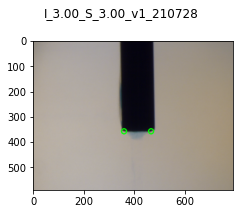

In [15]:
# draw nozzle dimensions on the image
# vd.yB = 420
vd.drawDiagnostics(1)

In [ ]:
# export the nozzle dimensions
vd.exportNozzleDims()

In [529]:
# manually change the nozzle mask
vd.xL = 320
vd.xR = 433
vd.yB = 340
vd.createNozzleMask()

INFO: Threshold: 130, product: 23.391503969105344, white:80


({'name': 'horiz1',
  'time': 42.51139043994015,
  'frac': 0.62,
  'behindX': 2,
  'projection': -0.6474820143884892,
  'projShift': 0.30935251798561153,
  'vertDispBot': -0.17625899280575538,
  'vertDispTop': 0.5863309352517986,
  'vertDispMid': 0.20503597122302158},
 {'name': '',
  'time': 's',
  'frac': '',
  'behindX': 'mm',
  'projection': 'mm',
  'projShift': 'mm',
  'vertDispBot': 'mm',
  'vertDispMid': 'mm',
  'vertDispTop': 'mm'})

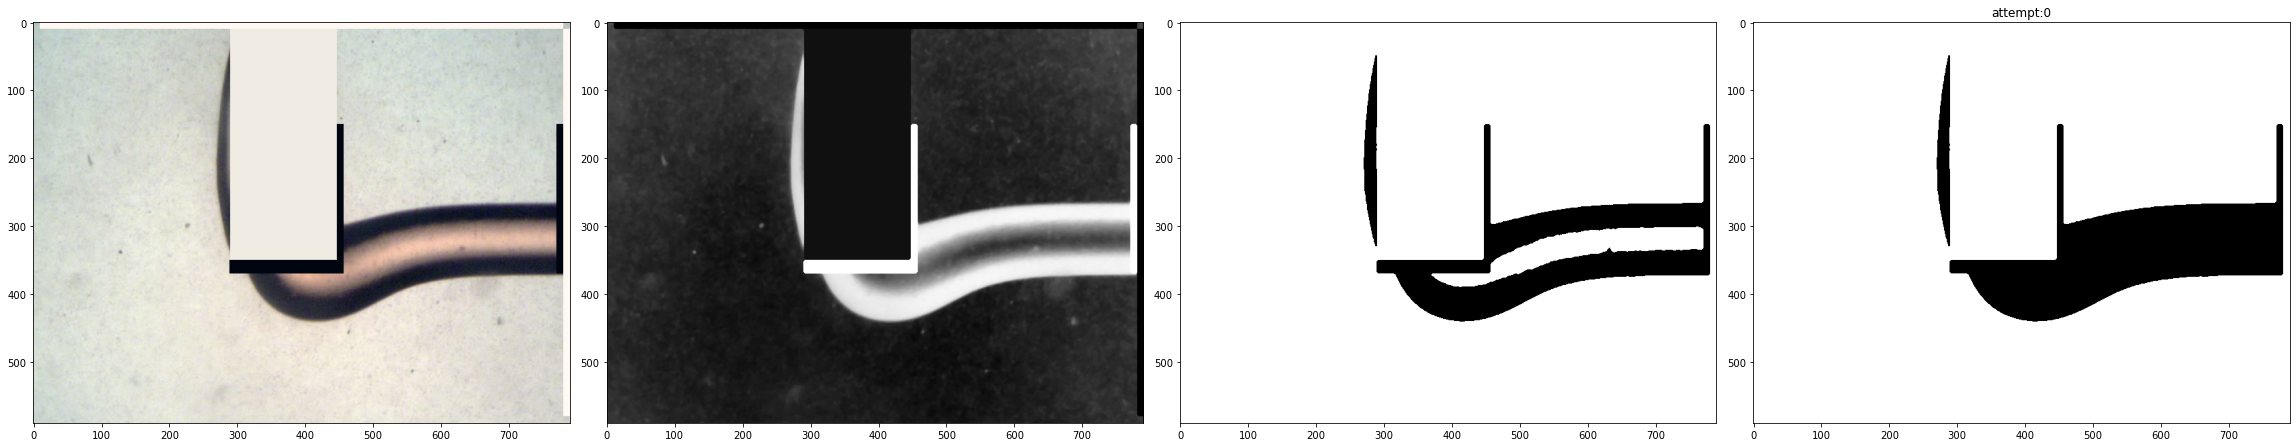

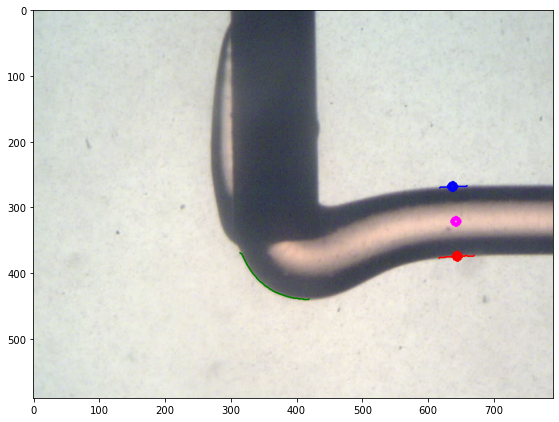

In [21]:
# measure a single frame
vd.measureFrameFromLine('vert1', 0.62, diag=2, topthresh=130)

In [ ]:
# measure horizontal lines
vd.measureVideoHoriz(overwrite=1, topthresh=130)

#### overwrite images

In [ ]:
# show a lineup of frames
dt0 = -1.5
flist = [vd.getLineFrame('xs2', t) for t in np.arange(dt0, dt0+1.1, 0.1)]
imshow(*flist)

In [ ]:
# overwrite the still frame
vd.overwriteFrame('xs2',-1.06, diag=True)

In [ ]:
# measure XS metrics
vd.measureVideoXS(overwrite=1, diag=1)

## test nozzle detection over several videos

In [ ]:
run ../tests/test_nozDetect